<a href="https://colab.research.google.com/github/gabrielefrn/qc-minicourse/blob/main/qc_minicourse_10abr24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum noise and error mitigation

Simulanting quantum noise

In [ ]:
!pip install numpy
!pip install git+https://github.com/qiboteam/qiboedu
!pip install qibo
!pip install qibojit

  Cloning https://github.com/qiboteam/qiboedu to /tmp/pip-req-build-lh9f7m6d
  Running command git clone --filter=blob:none --quiet https://github.com/qiboteam/qiboedu /tmp/pip-req-build-lh9f7m6d
  Resolved https://github.com/qiboteam/qiboedu to commit 57594cde061a007f0ee6015d05c7a95bd4627baa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.0 MB/s eta 0:00:00
  Created wheel for qiboedu: filename=qiboedu-0.1.0-py3-none-any.whl size=166

ERROR: Operation cancelled by user


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import qibo
from qibo import Circuit, gates, hamiltonians

from qiboedu.scripts import plotscripts

In [4]:
#set qibo's backend
qibo.get_backend()

[Qibo 0.2.7|INFO|2024-04-10 17:42:36]: Using qibojit (numba) backend on /CPU:0
INFO:qibo.config:Using qibojit (numba) backend on /CPU:0


'qibojit (numba)'

In [5]:
#define a parametric circuit with layered architecture
nqubits = 3
nlayers = 3

#activate density matrix mode
c = Circuit(nqubits, density_matrix=True)

for l in range(nlayers):
  for q in range(nqubits):
    c.add(gates.RY(q=q, theta=0))
    c.add(gates.RZ(q=q, theta=0))
  for q in range(0, nqubits-1, 1):
    c.add(gates.CNOT(q0=q, q1=q+1))
c.add(gates.M(*range(nqubits)))

MeasurementResult(qubits=(0, 1, 2), nshots=0)

In [9]:
print(c.draw())
print(f"\n",c.summary())

nparams = len(c.get_parameters())
print(f"Number of parameters: {nparams}")

q0: ─RY─RZ─o───RY─RZ─o───RY─RZ─o───M─
q1: ─RY─RZ─X─o─RY─RZ─X─o─RY─RZ─X─o─M─
q2: ─RY─RZ───X─RY─RZ───X─RY─RZ───X─M─

 Circuit depth = 13
Total number of gates = 25
Number of qubits = 3
Most common gates:
ry: 9
rz: 9
cx: 6
measure: 1
Number of parameters: 18


In [10]:
#fix the set of angles
angles = np.linspace(0, 2 * np.pi, nparams)
print(angles)

[0.         0.36959914 0.73919827 1.10879741 1.47839654 1.84799568
 2.21759481 2.58719395 2.95679309 3.32639222 3.69599136 4.06559049
 4.43518963 4.80478876 5.1743879  5.54398704 5.91358617 6.28318531]


In [11]:
#set the angles into the circuit
c.set_parameters(angles)

In [12]:
print(c.get_parameters())

[(0.0,), (0.36959913571644626,), (0.7391982714328925,), (1.1087974071493387,), (1.478396542865785,), (1.8479956785822313,), (2.2175948142986774,), (2.587193950015124,), (2.95679308573157,), (3.326392221448016,), (3.6959913571644627,), (4.065590492880909,), (4.435189628597355,), (4.804788764313801,), (5.174387900030248,), (5.543987035746694,), (5.91358617146314,), (6.283185307179586,)]


In [13]:
#observable definition
obs = hamiltonians.Z(nqubits=nqubits)
print(obs.matrix)

[[-3.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -1.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  1.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  3.-0.j]]


Computing the exact expectation valute:

(0.04098+0j)|000><000| + (0.05215+0.09312j)|000><001| + (-0.00872-0.02801j)|000><010| + (-0.03659-0.10883j)|000><011| + (0.02184-0.00063j)|000><100| + (0.00065+0.0529j)|000><101| + (-0.03929+0.03608j)|000><110| + (-0.00399+0.0879j)|000><111| + (0.05215-0.09312j)|001><000| + (0.27797-0j)|001><001| + (-0.07475-0.01582j)|001><010| + (-0.29388-0.05533j)|001><011| + (0.02635-0.05043j)|001><100| + (0.12105+0.06585j)|001><101| + (0.032+0.1352j)|001><110| + (0.19468+0.12092j)|001><111| + (-0.00872+0.02801j)|010><000| + (-0.07475+0.01582j)|010><001| + (0.021+0j)|010><010| + (0.08218-0.00185j)|010><011| + ...


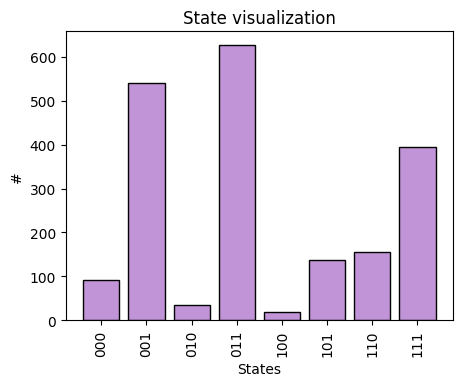

In [17]:
#execute the circuit
final_state = c(nshots=2000)

print(final_state)

#collect and visualize frequencies
frequencies = final_state.frequencies(binary=True)
#print(frequencies)

plotscripts.visualize_states(frequencies)